In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Unique values and information of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['SeniorCitizen'] = ["No" if value == 0 else "Yes" for value in df['SeniorCitizen']]

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['tenure'] = [float(value) for value in df['tenure']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
for i in df:
    print(f'{i} : {df[i].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessB

# Dataset Information
* gender : Male/Female
* Senior Citizen : Yes / No
* Partner : Yes / No
* Dependents : Yes / No
* PhoneService : Yes / No
* MultipleLines : No phone service / No / Yes
* InternetService : DSL / Fiber optic / No
* OnlineSecurity : Yes / No / No internet service
* OnlineBackup : Yes / No / No internet service
* DeviceProtection : Yes / No / No internet service
* TechSupport : Yes / No / No internet service
* StreamingTV : Yes / No / No internet service
* StreamingMovies : Yes / No / No internet service
* Contract : Month-to-month / One year / Two year
* PaperlessBilling : Yes / No
* PaymentMethod : Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic)

In [10]:
df.shape

(7043, 21)

# Data Checks performance
* Check Missing values
* Check Duplicates
* Check data type
* Check statistics of data set
* Check number of numerical data
* Check number of categorical data

Missing Values

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In "TotalCharges" column there are 11 missing values and we have to impute them with most relevant values

Imputing of null values

In [12]:
m = df['TotalCharges'].mean()
df['TotalCharges'].fillna(m, inplace=True)

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check Duplicates

In [14]:
df.duplicated().sum()

0

There are no duplicates

Check datatype

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking the number of unique values of each column

In [16]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Statistics of dataset

In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


* In the above statistics mean of 'MonthlyCharges' is approximately doubled the mean of 'tenure'
* Standard Deviation is slighly close to each other for 'tenure' and 'Monthly Charges'

Check Number of categorical data

In [18]:
for i in df:
    if df[i].dtype=='object':
        print(f'{i} : {df[i].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Check number of numerical data

In [19]:
for i in df:
    if df[i].dtype=='float64':
        print(f'{i} : {df[i].unique()}')

tenure : [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We dont need CustomerID column

In [21]:
df = df.drop('customerID', axis=1)

In [22]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
# plt.title('Correlation Heatmap')
# plt.show()

statistics for number of Chustomer churned

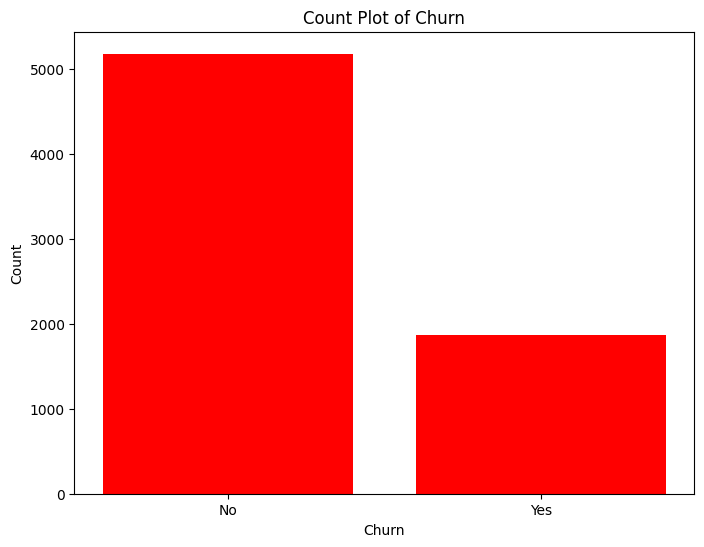

In [23]:
churn_count = df['Churn'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(churn_count.index, churn_count, color = 'red')
plt.title('Count Plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

We can see that the distribution of data is unbalanced either we can balnce it or keep it as it is

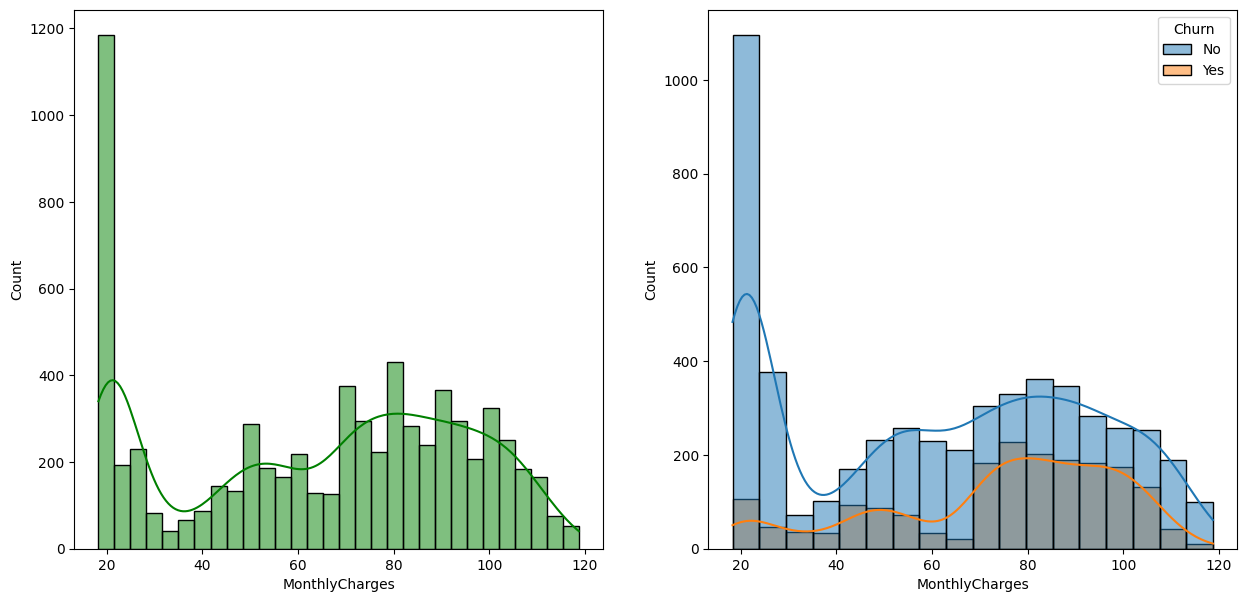

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='MonthlyCharges',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='MonthlyCharges',kde=True,hue='Churn')
plt.show()

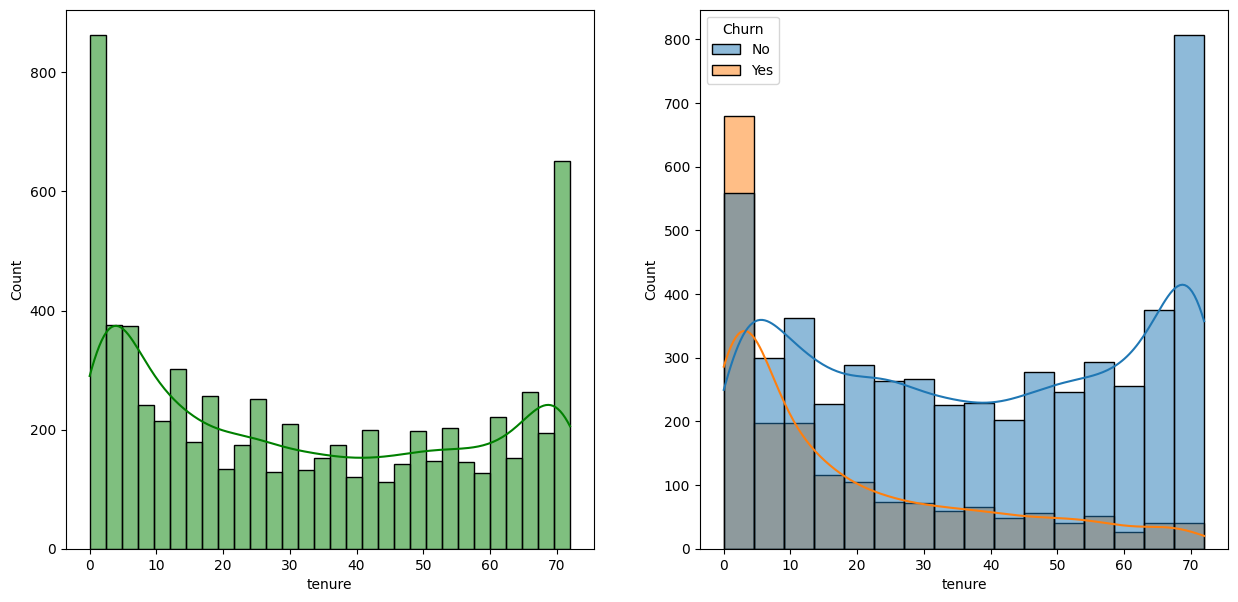

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='tenure',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='tenure',kde=True,hue='Churn')
plt.show()

In [26]:
# df.replace('No internet service', 'No', inplace=True)

In [27]:
# df.replace('No phone service', 'No', inplace=True)

In [28]:
# for i in df:
#     if df[i].dtype == 'object':
#         print(f"{i} : {df[i].unique()}")

In [29]:
# yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
#         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# for i in yes_no:
#     df[i].replace({'Yes':1, 'No':0}, inplace=True) 

In [30]:
# for i in df:
#     print(df[i].unique())

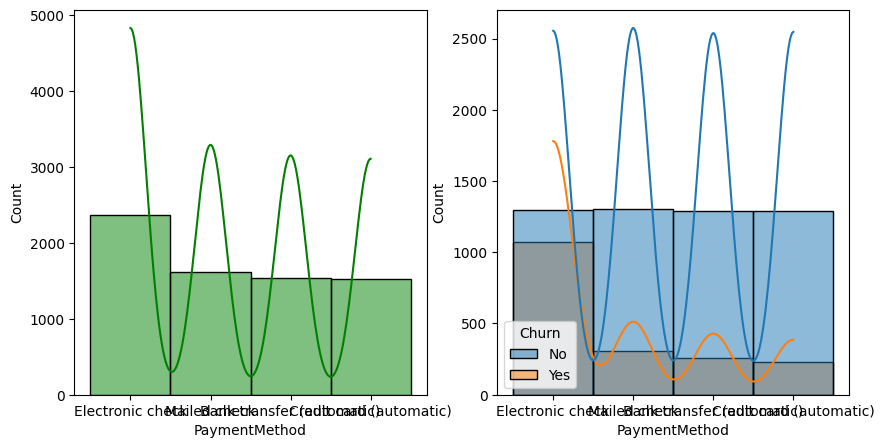

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='PaymentMethod',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='PaymentMethod',kde=True,hue='Churn')
plt.show()

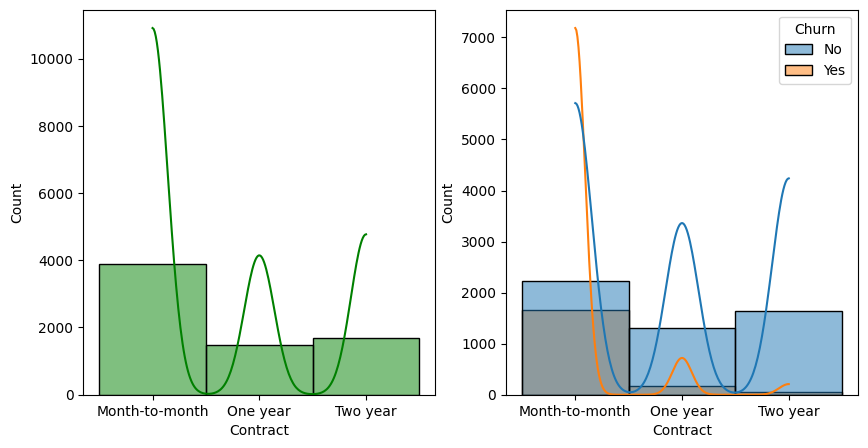

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df, x='Contract', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Contract', kde=True, hue='Churn')
plt.show()


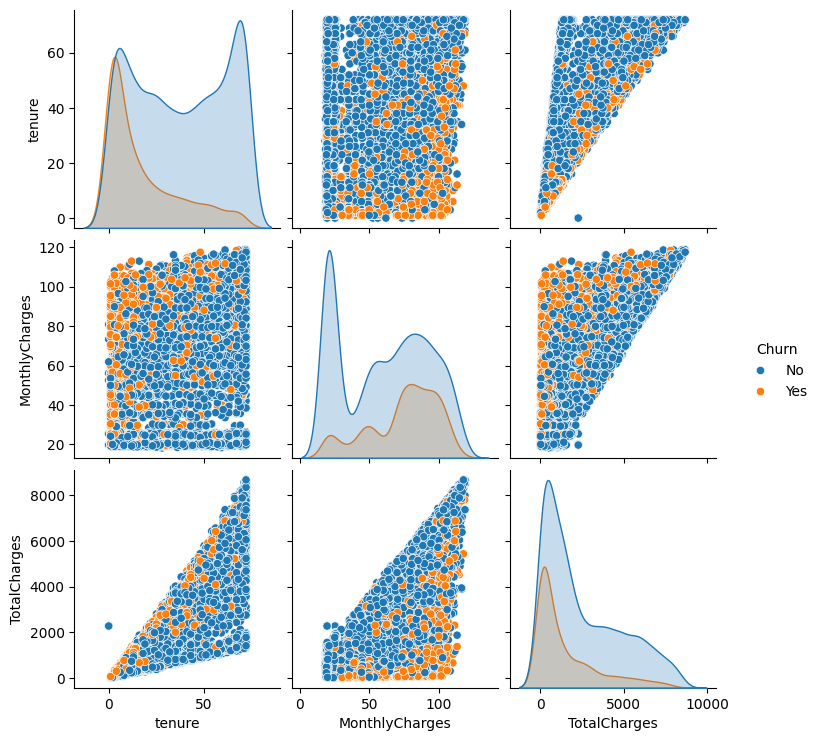

In [36]:
sns.pairplot(df,hue = 'Churn')
plt.show()

In [37]:
for i in df:
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26.  0.
 39.]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic

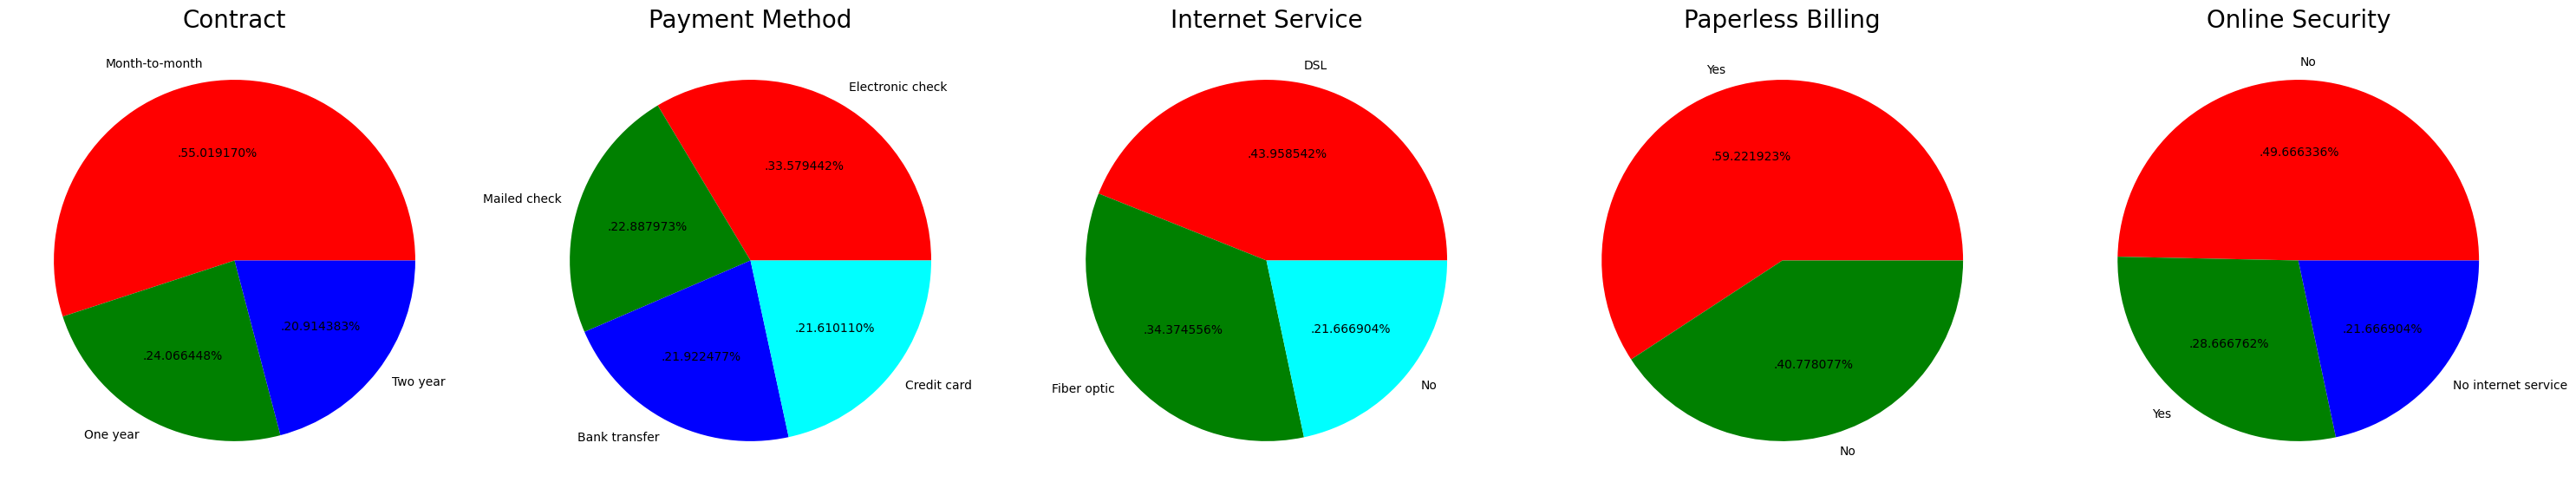

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Contract'].value_counts()
labels = 'Month-to-month', 'One year', 'Two year'
color = ['red','green', 'blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Contract', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['PaymentMethod'].value_counts()
labels = 'Electronic check', 'Mailed check','Bank transfer', 'Credit card'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Payment Method', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['InternetService'].value_counts()
labels = 'DSL','Fiber optic','No'
color = ['red','green', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Internet Service', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['PaperlessBilling'].value_counts()
labels = 'Yes', 'No'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Paperless Billing', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['OnlineSecurity'].value_counts()
labels = 'No', 'Yes', 'No internet service'
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Online Security', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()